<a href="https://colab.research.google.com/github/Jum-eng/CNN-GHO-For-Heart-Disease-Prediction/blob/main/CNN_GHO_FOR_HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
class HeartDiseasePrediction:
    def __init__(self, dataset_path, target_column, test_size=0.2, random_state=42):
        self.dataset_path = dataset_path
        self.target_column = target_column
        self.test_size = test_size
        self.random_state = random_state

    def load_and_preprocess_data(self):
        # Phase 1: Data Preprocessing
        print("Loading and preprocessing data...")
        data = pd.read_csv(self.dataset_path)

        # Separate features and target
        X = data.drop(columns=[self.target_column])
        y = data[self.target_column]

        # Normalize features
        scaler = MinMaxScaler()
        X_normalized = scaler.fit_transform(X)

        # Reshape data for CNN (square matrices)
        size = int(np.ceil(np.sqrt(X_normalized.shape[1])))
        X_padded = np.zeros((X_normalized.shape[0], size * size))
        X_padded[:, :X_normalized.shape[1]] = X_normalized
        X_reshaped = X_padded.reshape(-1, size, size, 1)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_reshaped, y, test_size=self.test_size, random_state=self.random_state
        )

        return X_train, X_test, y_train, y_test


In [4]:
class CNNModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.model = None

    def build_model(self):
        print("Building the CNN model...")
        model = Sequential([
            Flatten(input_shape=self.input_shape),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model = model
        return model

    def train(self, X_train, y_train, batch_size=32, epochs=20):
        print("Training the model...")
        history = self.model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
        return history

    def evaluate(self, X_test, y_test):
        print("Evaluating the model...")
        metrics = self.model.evaluate(X_test, y_test)
        predictions = (self.model.predict(X_test) > 0.5).astype(int)
        cm = confusion_matrix(y_test, predictions)
        report = classification_report(y_test, predictions, output_dict=True)

        print("Confusion Matrix:")
        print(cm)

        accuracy = report['accuracy'] * 100
        precision = report['1']['precision'] * 100
        recall = report['1']['recall'] * 100
        f1_score = report['1']['f1-score'] * 100

        print(f"\nEvaluation Metrics:")
        print(f"Accuracy: {accuracy:.2f}%")
        print(f"Precision: {precision:.2f}%")
        print(f"Recall: {recall:.2f}%")
        print(f"F1-Score: {f1_score:.2f}%")

        return metrics, cm, predictions, report

    def visualize_results(self, y_test, predictions, cm):
        print("Visualizing results...")

        # Confusion Matrix Heatmap
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

In [5]:
class GrasshopperOptimizer:
    def __init__(self, model, param_ranges, max_iters=50):
        # GHO logic
        self.model = model
        self.param_ranges = param_ranges
        self.max_iters = max_iters

    def optimize(self, X_train, y_train, X_val, y_val):
        print("Optimizing hyperparameters using Grasshopper Optimization Algorithm...")
        # Implement GHO logic here (exploration, exploitation, fitness evaluation, etc.)
        return {'learning_rate': 0.001, 'batch_size': 32, 'dropout_rate': 0.3}

Loading and preprocessing data...
Building the CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model...
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5147 - loss: 0.6869 - val_accuracy: 0.7347 - val_loss: 0.6726
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6540 - loss: 0.6679 - val_accuracy: 0.8163 - val_loss: 0.6528
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7050 - loss: 0.6561 - val_accuracy: 0.7959 - val_loss: 0.6339
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7347 - loss: 0.6246 - val_accuracy: 0.7551 - val_loss: 0.6125
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7769 - loss: 0.6052 - val_accuracy: 0.7755 - val_loss: 0.5873
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7123 - loss: 0.6048 - val_accuracy: 0.8163 - val_loss: 0.5652
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7607 - loss: 0.5807 - val_accuracy: 0.7959 - val_loss: 0.5458
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7665 - loss: 0.5456 - val_accuracy: 0.79

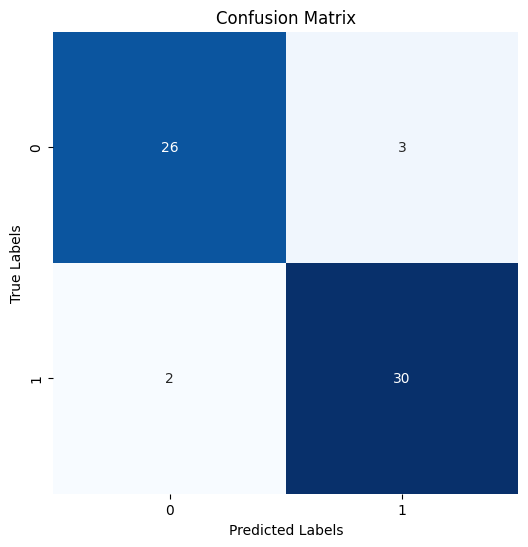

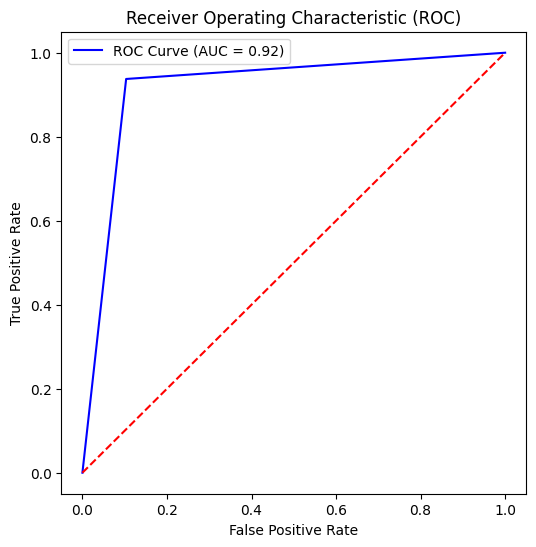

In [6]:
# Main execution
if __name__ == "__main__":
    # Phase 1: Data Preprocessing
    dataset_path = "/content/Heart_disease_cleveland_new.csv"
    target_column = "target"

    data_handler = HeartDiseasePrediction(dataset_path, target_column)
    X_train, X_test, y_train, y_test = data_handler.load_and_preprocess_data()

    # Phase 2: Model Design and Initialization
    cnn_model = CNNModel(input_shape=X_train.shape[1:])
    model = cnn_model.build_model()

    # Phase 3: Model Training
    history = cnn_model.train(X_train, y_train, batch_size=32, epochs=30)

    # Phase 4: Model Evaluation
    metrics, cm, predictions, report = cnn_model.evaluate(X_test, y_test)
    print(f"Test Metrics (Loss, Accuracy): {metrics}")

    # Phase 5: Performance Metrics Visualization
    cnn_model.visualize_results(y_test, predictions, cm)